Final Project: here is the code for sentiment analysis and data cleaning for The Hate U Give

In [ ]:
#import the libraries we need (stolen from 4-1)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re

#fix displays for better output (also stolen from 4-1)
pd.options.display.max_rows = 20
pd.options.display.max_columns = 10

print("lets get this show on the road!")

lets get this show on the road!


In [ ]:
#needed to mount my drive here so i could import all of the different data sets we have! hashtag what can u do hashtag wish this was easier

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the first set of scraped data (we'll do this for every movie we have!) (also stolen from 4-1)

#df = pd.read_csv('/content/drive/MyDrive/Sharedwithme/ResearchProject_WRIT/TheHateUGiveReviews.csv')

#initially i tried to use it from a shared file but that was Not working which makes sense now that i squint, so i put them all in their own file on my own google drive and moved on down the road

df = pd.read_csv('/content/drive/MyDrive/WRIT20833/Data/TheHateUGiveReviews.csv')

print(f"yess dataset loaded successfully!")
print(f"dataset contains {len(df)} items")

#wow that is a lot of items

yess dataset loaded successfully!
dataset contains 700 items


In [ ]:
#let's analyze these one at a time! but first we need to make sure this is loading in the right way. (thieved from 4-1)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

text_column = 'review'

print(f"Text column has {df[text_column].isna().sum()} missing values")
print(f"Sample text: {df[text_column].iloc[0][:200]}")


Dataset shape: (700, 2)
Columns: ['date', 'review']
Text column has 0 missing values
Sample text: Honestly.. The acting was horrific It felt like it was recorded by kid off a iphone 8. I love the book and the message it sent across but the movie doesn't at all come close. I understand that not eve


In [ ]:
#let's now look at what this data set actually looks like. (you guessed it... ripped from 4-1)

print("=== DATASET LOOK AROUND ===")
print(f"Total entries: {len(df)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst few rows:")
df.head()

=== DATASET LOOK AROUND ===
Total entries: 700

Data types:
date      object
review    object
dtype: object

First few rows:


,date,review
0,"Aug 29, 2025",Honestly.. The acting was horrific It felt lik...
1,"Jul 6, 2025",Social conscious movie makes you really think ...
2,"Mar 6, 2025",I read The Hate U Give by Angie Thomas and saw...
3,"Mar 6, 2025",The Hate U Give by Angie Thomas was an amazing...
4,"Feb 9, 2025",A movie who's sole purpose is to raise social ...


In [ ]:
#adding stopwords that don't matter all that much (stolen from 1-1 and 4-1)

stopwords = [
    #basic stopwords from HW1
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is",
    "are", "was", "were", "be", "been", "being", "have", "has", "had", "having",
    "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or",
    "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above",
    "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
    "again", "further", "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "any", "both", "each", "few", "more", "most", "other", "some",
    "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very",
    "s", "t", "can", "will", "just", "don", "should", "now", "ve", "ll", "amp",

    #additional common words for and for movie reviews in general
    "movie", "5", "4", "3", "2", "1"
]

print(f"yipee! stopwords list loaded: {len(stopwords)} words to filter out")

yipee! stopwords list loaded: 136 words to filter out


In [ ]:
#lets clean this up! (yet again...stolen from 4-1)
def split_into_words(text):
    """Split text into words (same approach as HW1)"""
    if pd.isna(text):  # Handle missing text
        return []
    lowercase_text = str(text).lower()
    # Split text into words by looking for places where letters/numbers are not present
    split_words = re.split("\\W+", lowercase_text)
    return [word for word in split_words if word]  # Remove empty strings

def clean_for_sentiment(text):
    """Clean text for sentiment analysis (keep punctuation!)"""
    if pd.isna(text):
        return ""
    # Keep punctuation and capitalization - VADER needs them!
    return str(text).strip()

print("wahoo! text processing functions ready")

wahoo! text processing functions ready


In [ ]:
#mnkay now it's time to clean the text for sentiment analysis.

#(keep punctuation!!!!!!!!!!!!)
df['clean_text_sentiment'] = df[text_column].apply(clean_for_sentiment)

#create word lists for term frequency analysis (like HW1) (this is a mystery mouskatool that will help us later)

df['words'] = df[text_column].apply(split_into_words)
df['meaningful_words'] = df['words'].apply(lambda word_list: [word for word in word_list if word not in stopwords])

print("slay!!! text cleaning complete")
print(f"Sample cleaned text for sentiment: {df['clean_text_sentiment'].iloc[0][:100]}...")
print(f"Sample meaningful words: {df['meaningful_words'].iloc[0][:10]}")

slay!!! text cleaning complete
Sample cleaned text for sentiment: Honestly.. The acting was horrific It felt like it was recorded by kid off a iphone 8. I love the bo...
Sample meaningful words: ['honestly', 'acting', 'horrific', 'felt', 'like', 'recorded', 'kid', 'iphone', '8', 'love']


In [ ]:
#let's make sure all that cleaning actually worked here please (all this hard work can't be for nothing) (still stolen from 4-1 and 1-1)

sample_text = df[text_column].iloc[0]
print(f"Original: {sample_text[:100]}")
print(f"For sentiment: {df['clean_text_sentiment'].iloc[0][:100]}")
print(f"Meaningful words: {df['meaningful_words'].iloc[0][:15]}")
# Should show: sentiment text keeps punctuation, meaningful words exclude stopwords

#fixed! something was broken idk i tried to run the code a few times and it was coming up errors but i restarted everything and magically it's working

Original: Honestly.. The acting was horrific It felt like it was recorded by kid off a iphone 8. I love the bo
For sentiment: Honestly.. The acting was horrific It felt like it was recorded by kid off a iphone 8. I love the bo
Meaningful words: ['honestly', 'acting', 'horrific', 'felt', 'like', 'recorded', 'kid', 'iphone', '8', 'love', 'book', 'message', 'sent', 'across', 'doesn']


In [ ]:
# Combine all meaningful words from your dataset (like HW1) (stolen from hw 4-1)
all_meaningful_words = []
for word_list in df['meaningful_words']:
    all_meaningful_words.extend(word_list)

# Count word frequencies (same as HW1)
word_frequency = Counter(all_meaningful_words)
top_words = word_frequency.most_common(20)  # Get top 20 words because that's a god chunk i think

print("🔤 TERM FREQUENCY ANALYSIS RESULTS")
print("=" * 40)
print(f"Total words analyzed: {len(all_meaningful_words):,}")
print(f"Unique words found: {len(word_frequency):,}")
print(f"\nTop 20 most frequent words:")

for i, (word, count) in enumerate(top_words, 1):
    print(f"{i:2d}. {word:<15} ({count:,} times)")

🔤 TERM FREQUENCY ANALYSIS RESULTS
Total words analyzed: 16,447
Unique words found: 3,655

Top 20 most frequent words:
 1. film            (246 times)
 2. see             (162 times)
 3. great           (154 times)
 4. black           (140 times)
 5. good            (131 times)
 6. people          (131 times)
 7. starr           (125 times)
 8. one             (118 times)
 9. story           (113 times)
10. book            (111 times)
11. like            (107 times)
12. powerful        (102 times)
13. give            (98 times)
14. hate            (95 times)
15. really          (95 times)
16. well            (92 times)
17. best            (84 times)
18. message         (83 times)
19. u               (79 times)
20. acting          (76 times)


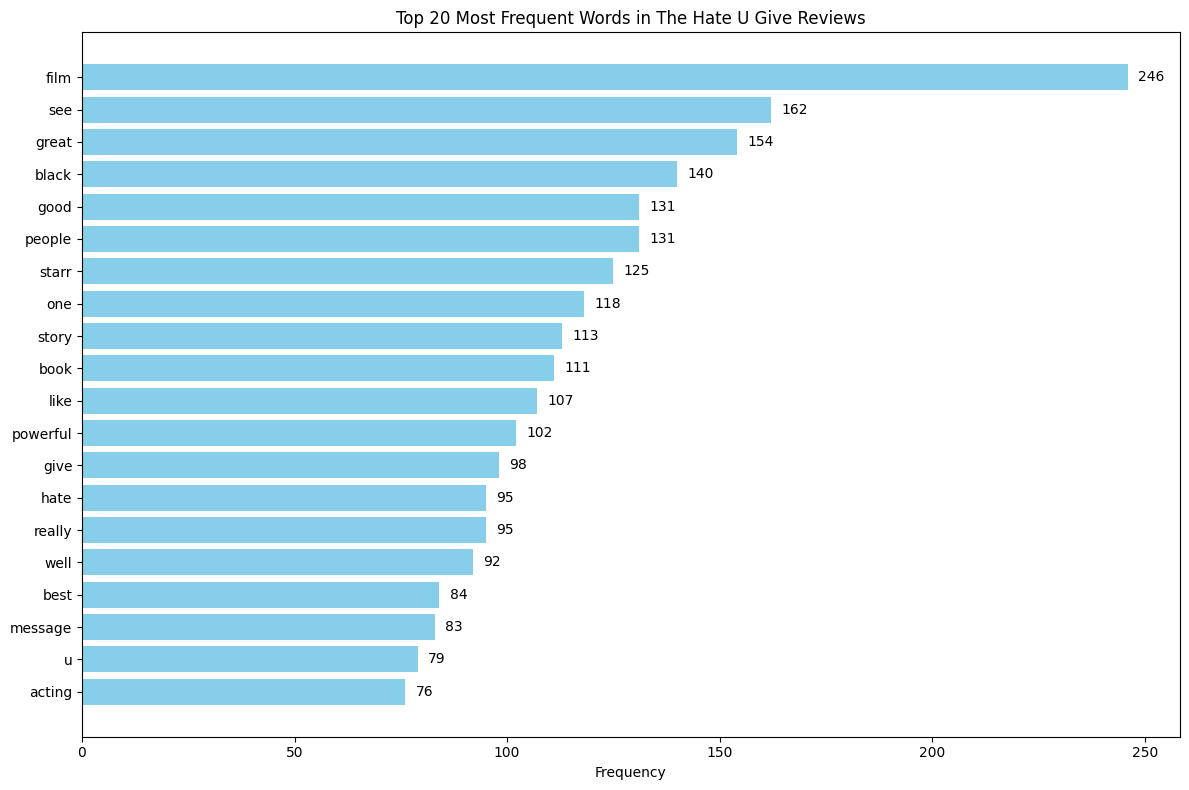

yes!! term frequency visualization complete!


In [ ]:
# Create visualization of top words
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

plt.figure(figsize=(12, 8))
plt.barh(range(len(words)), counts, color='skyblue')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title(f'Top {len(words)} Most Frequent Words in The Hate U Give Reviews')
plt.gca().invert_yaxis()  # Put highest frequency at top

# Add count labels on bars
for i, count in enumerate(counts):
    plt.text(count + max(counts)*0.01, i, str(count), va='center')

plt.tight_layout()
plt.show()

print("yes!! term frequency visualization complete!")

In [ ]:
# Install and import VADER
#luke i am your father (this is the second time ive made this joke.)
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

print("✅ VADER installed and ready for sentiment analysis!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.9 MB/s eta 0:00:00
✅ VADER installed and ready for sentiment analysis!


In [ ]:
#checkpoint 3: did VADER setup correctly
#hmm. no it did not. reloading.

#seriously wth is happening

#ok fixed somehow i signed out and signed back in and re-ran

test_text = "This assignment is surprisingly interesting!"
test_result = analyzer.polarity_scores(test_text)
print(f"Test text: {test_text}")
print(f"VADER result: {test_result}")
# Should see: {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6588} (or similar)

Test text: This assignment is surprisingly interesting!
VADER result: {'neg': 0.0, 'neu': 0.366, 'pos': 0.634, 'compound': 0.636}


In [ ]:
# Apply sentiment analysis to the entire dataset
def get_sentiment_score(text):
    """Get compound sentiment score for a text"""
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis to the entire dataset
df['sentiment_score'] = df['clean_text_sentiment'].apply(get_sentiment_score)

print("✅ Sentiment analysis complete for entire dataset!")
print(f"\nSentiment score range: {df['sentiment_score'].min():.3f} to {df['sentiment_score'].max():.3f}")
print(f"Average sentiment: {df['sentiment_score'].mean():.3f}")

#hello range- the most negative you can be to the most positive you can be.

✅ Sentiment analysis complete for entire dataset!

Sentiment score range: -0.997 to 0.995
Average sentiment: 0.453


In [ ]:
# Analyze sentiment patterns in your data
print("The Hate U Give: SENTIMENT ANALYSIS SUMMARY")
print("=" * 35)

# Basic statistics
print(f"Total entries analyzed: {len(df)}")
print(f"Average sentiment: {df['sentiment_score'].mean():.3f}")
print(f"Most positive entry: {df['sentiment_score'].max():.3f}")
print(f"Most negative entry: {df['sentiment_score'].min():.3f}")
print(f"Standard deviation: {df['sentiment_score'].std():.3f}")

# Categorize sentiments
positive = len(df[df['sentiment_score'] > 0.1])
neutral = len(df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)])
negative = len(df[df['sentiment_score'] < -0.1])

print(f"\nSentiment distribution:")
print(f"Positive (>0.1): {positive} ({positive/len(df)*100:.1f}%)")
print(f"Neutral (-0.1 to 0.1): {neutral} ({neutral/len(df)*100:.1f}%)")
print(f"Negative (<-0.1): {negative} ({negative/len(df)*100:.1f}%)")

The Hate U Give: SENTIMENT ANALYSIS SUMMARY
Total entries analyzed: 700
Average sentiment: 0.453
Most positive entry: 0.995
Most negative entry: -0.997
Standard deviation: 0.521

Sentiment distribution:
Positive (>0.1): 528 (75.4%)
Neutral (-0.1 to 0.1): 67 (9.6%)
Negative (<-0.1): 105 (15.0%)


In [ ]:
#find most positive and negative examples (because that's what's juciest and most interesting)
most_positive = df.loc[df['sentiment_score'].idxmax()]
most_negative = df.loc[df['sentiment_score'].idxmin()]

print(f"📈 MOST POSITIVE ENTRY (score: {most_positive['sentiment_score']:.3f}):")
print(f"Text: {most_positive['clean_text_sentiment'][:200]}...")
print()
print(f"📉 MOST NEGATIVE ENTRY (score: {most_negative['sentiment_score']:.3f}):")
print(f"Text: {most_negative['clean_text_sentiment'][:200]}...")

📈 MOST POSITIVE ENTRY (score: 0.995):
Text: Honestly.. The acting was horrific It felt like it was recorded by kid off a iphone 8. I love the book and the message it sent across but the movie doesn't at all come close. I understand that not eve...

📉 MOST NEGATIVE ENTRY (score: -0.997):
Text: Terrible, boring, pretentious, predictable, unoriginal, cliched, and extremely overrated. The Hate U Give is nothing but more stupid Hollywood anti-white propaganda. Amandla Stenburg is still a lousy,...


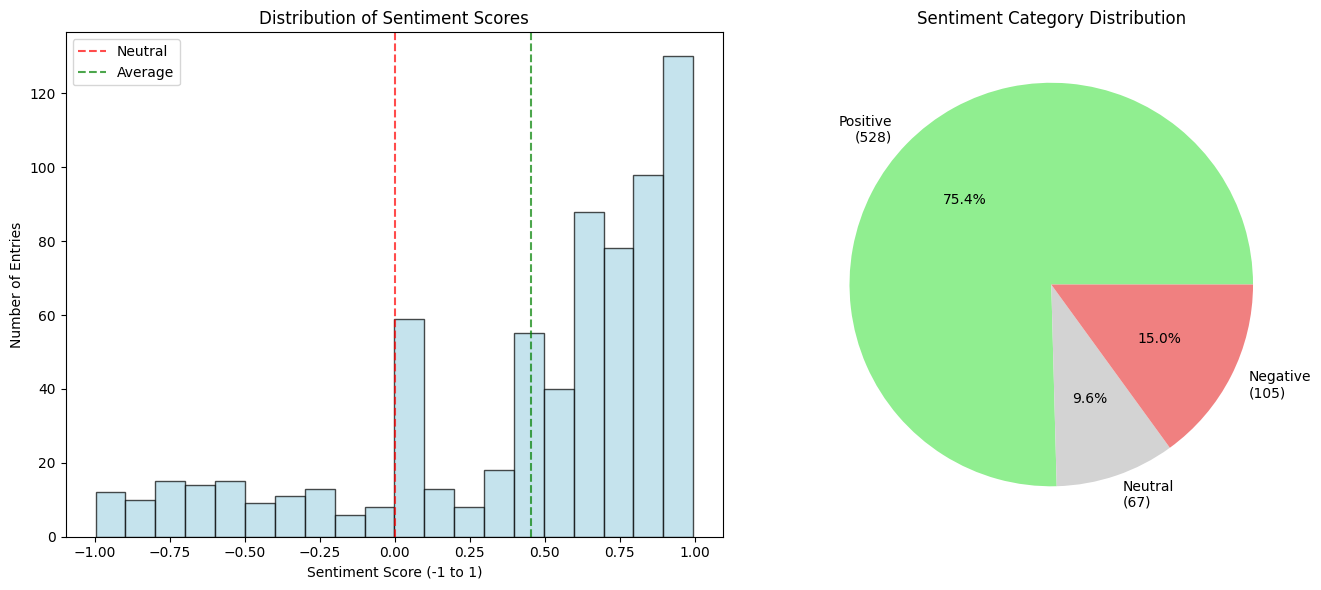

📊 Sentiment visualizations complete!


In [ ]:
# Create sentiment visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sentiment distribution histogram
axes[0].hist(df['sentiment_score'], bins=20, color='lightblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution of Sentiment Scores')
axes[0].set_xlabel('Sentiment Score (-1 to 1)')
axes[0].set_ylabel('Number of Entries')
axes[0].axvline(0, color='red', linestyle='--', alpha=0.7, label='Neutral')
axes[0].axvline(df['sentiment_score'].mean(), color='green', linestyle='--', alpha=0.7, label='Average')
axes[0].legend()

# Sentiment categories pie chart
sentiment_counts = [positive, neutral, negative]
sentiment_labels = [f'Positive\n({positive})', f'Neutral\n({neutral})', f'Negative\n({negative})']
colors = ['lightgreen', 'lightgray', 'lightcoral']

axes[1].pie(sentiment_counts, labels=sentiment_labels, colors=colors, autopct='%1.1f%%')
axes[1].set_title('Sentiment Category Distribution')

plt.tight_layout()
plt.show()

print("📊 Sentiment visualizations complete!")

In [ ]:
# Analyze word frequency in positive vs. negative entries
positive_entries = df[df['sentiment_score'] > 0.1]
negative_entries = df[df['sentiment_score'] < -0.1]

print("🔍 COMPARING WORDS IN POSITIVE vs. NEGATIVE ENTRIES")
print("=" * 55)

# Get top words from positive entries
positive_words = []
for word_list in positive_entries['meaningful_words']:
    positive_words.extend(word_list)
positive_freq = Counter(positive_words)

# Get top words from negative entries
negative_words = []
for word_list in negative_entries['meaningful_words']:
    negative_words.extend(word_list)
negative_freq = Counter(negative_words)

print(f"Top 10 words in POSITIVE entries ({len(positive_entries)} entries):")
for word, count in positive_freq.most_common(10):
    print(f"  {word:<15} ({count} times)")

print(f"\nTop 10 words in NEGATIVE entries ({len(negative_entries)} entries):")
for word, count in negative_freq.most_common(10):
    print(f"  {word:<15} ({count} times)")

🔍 COMPARING WORDS IN POSITIVE vs. NEGATIVE ENTRIES
Top 10 words in POSITIVE entries (528 entries):
  film            (192 times)
  great           (148 times)
  good            (118 times)
  see             (118 times)
  story           (95 times)
  powerful        (95 times)
  black           (94 times)
  one             (92 times)
  book            (91 times)
  people          (89 times)

Top 10 words in NEGATIVE entries (105 entries):
  black           (45 times)
  starr           (45 times)
  film            (42 times)
  people          (37 times)
  white           (34 times)
  give            (32 times)
  hate            (31 times)
  police          (28 times)
  one             (25 times)
  u               (24 times)


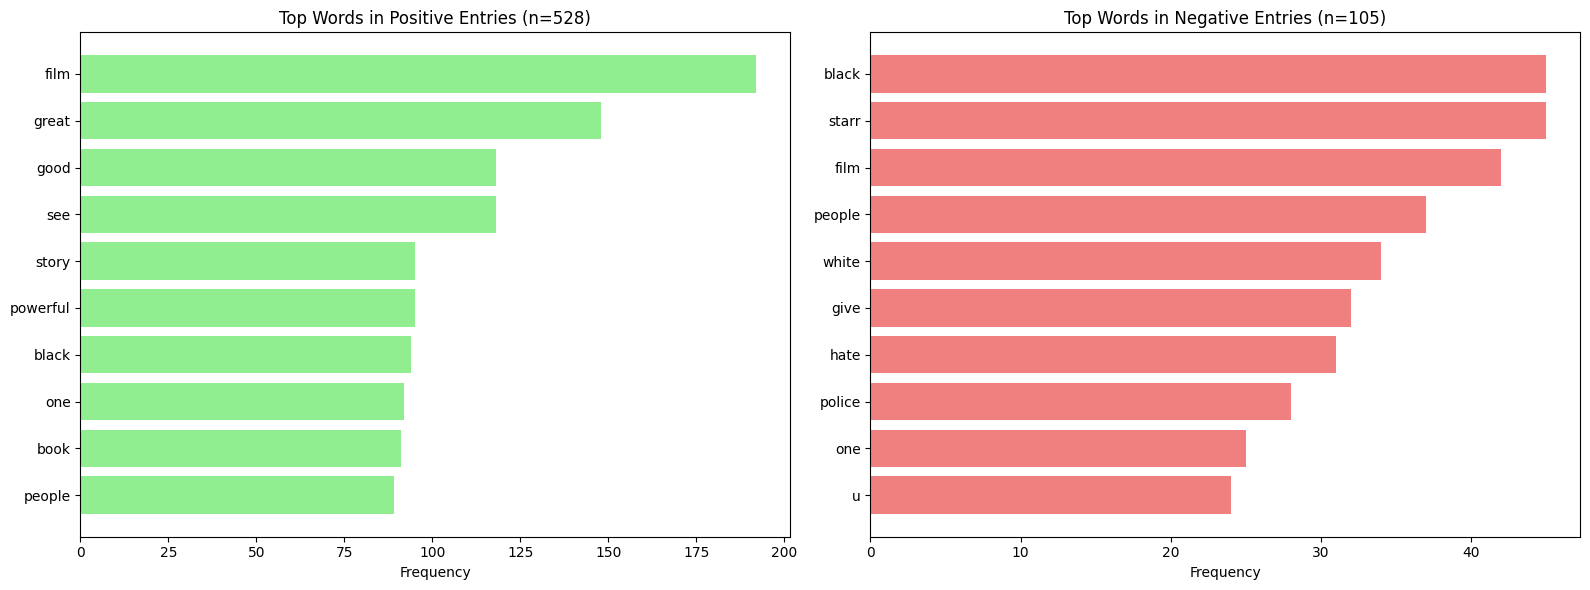

In [ ]:
# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive words
pos_words = [word for word, count in positive_freq.most_common(10)]
pos_counts = [count for word, count in positive_freq.most_common(10)]

axes[0].barh(range(len(pos_words)), pos_counts, color='lightgreen')
axes[0].set_yticks(range(len(pos_words)))
axes[0].set_yticklabels(pos_words)
axes[0].set_title(f'Top Words in Positive Entries (n={len(positive_entries)})')
axes[0].set_xlabel('Frequency')
axes[0].invert_yaxis()

# Negative words
neg_words = [word for word, count in negative_freq.most_common(10)]
neg_counts = [count for word, count in negative_freq.most_common(10)]

axes[1].barh(range(len(neg_words)), neg_counts, color='lightcoral')
axes[1].set_yticks(range(len(neg_words)))
axes[1].set_yticklabels(neg_words)
axes[1].set_title(f'Top Words in Negative Entries (n={len(negative_entries)})')
axes[1].set_xlabel('Frequency')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
# Save your cleaned dataset
output_filename = 'TheHateUGive_cleaned_data.csv'
df.to_csv(output_filename, index=False)
#again, for some reason i can never find the data that it actually saves anywhere or anything, so i am adding the same save data code that worked last time in 3-2! and in 4-1! and in 4-2!!!

from google.colab import files
files.download('TheHateUGive_cleaned_data.csv')
print(f"✅ Saved cleaned dataset as: {output_filename}")

print(f"✅ Cleaned dataset saved as: {output_filename}")
print(f"\nDataset summary:")
print(f"- Total entries: {len(df)}")
print(f"- Columns: {df.columns.tolist()}")
print(f"- Average sentiment score: {df['sentiment_score'].mean():.3f}")
print(f"- Most frequent word: '{top_words[0][0]}' ({top_words[0][1]} times)")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Saved cleaned dataset as: TheHateUGive_cleaned_data.csv
✅ Cleaned dataset saved as: TheHateUGive_cleaned_data.csv

Dataset summary:
- Total entries: 700
- Columns: ['date', 'review', 'clean_text_sentiment', 'words', 'meaningful_words', 'sentiment_score']
- Average sentiment score: 0.453
- Most frequent word: 'film' (246 times)


In [ ]:
#now, let's do this for all the other data sets. whew.